# Domain –Social Media

## FOCUS –PREDICT NO.OF SHARES OF AN ARTICLE

## Mashable (www.mashable.com) --is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.Just like any other media company its success depends on the popularity of articles.  And one of the key metrics to measure popularity is no. of shares done on article.Over period of few years Mashable has collected data on around 40,000 articles. You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters.

# KEY ISSUES
   ## Data contains large number of features
   ## Prediction is of continuous value (shares) 

# CONSIDERATIONS
  ## NONE 

## DATA VOLUME - 39797 records – file - OnlineNewsPopularity.csv

# Fields in Data
   ## Details in Module-12-Project-Popularity-Analysis.ipynb notebook

# ADDITIONAL INFORMATION
   ## NA

# BUSINESS BENEFITS4
   ## Mashable’s entire business is dependent on popularity of articles. With accurate prediction of shares, company can choose which articles to publish hence driving higher user engagement and profits. Rough estimate is 1% increase in engagement time (minutes) increases profit by up to 5%. 



In [1]:
import os
os.chdir(r'C:\Users\user\OneDrive\Codes\ML\Edureka\Course Folder\Certification Project I\542_proj_dataset_1_v1.0')

In [2]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# Load the dataset and read

data = pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Dataset relation, description and info

data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

# Performing Exploratory Data Analysis on dataset

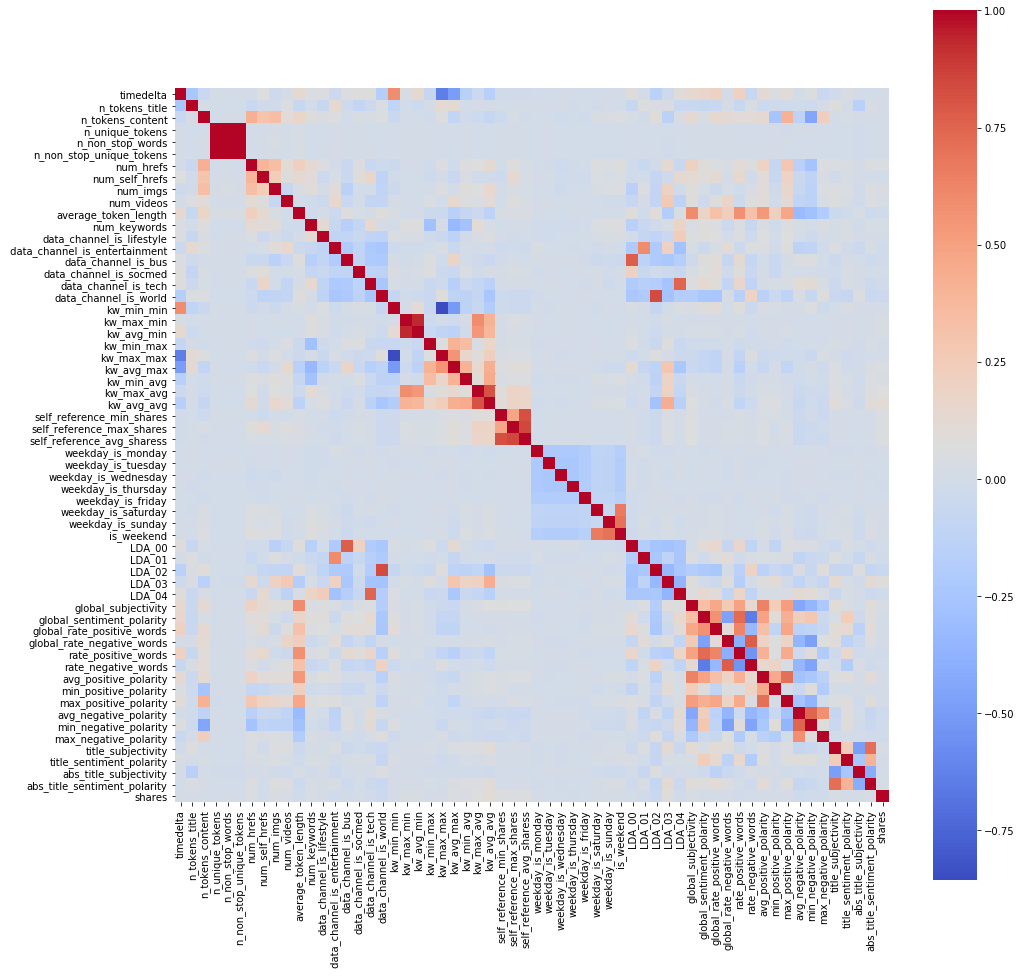

In [6]:
# Correlation in the data

corr = data.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr, cmap='coolwarm', square=True)

In [7]:
# Eliminating the first 2 columns and the target columns

data_x = data.drop(['url', data.columns[1], data.columns[-1]], axis=1)
data_x.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [8]:
# Select the weekdays to plot the count of popularity and unpopularity article

print(data_x.columns[29:36])
days = data_x.columns[29:36]

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'],
      dtype='object')


In [9]:
# Seperating popular & unpopular on basis of shares count

unpopular = data[data['shares']<1400]
popular = data[data['shares']>=1400]

In [10]:
# Popular days & Unpopular days

p_days = popular[days].sum().values
up_days = unpopular[days].sum().values

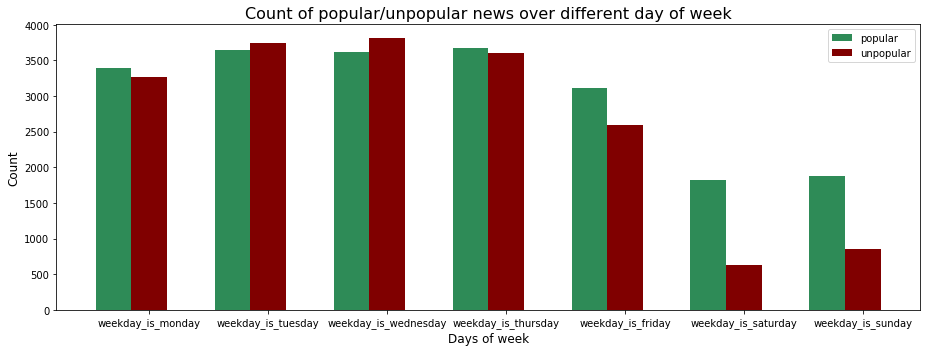

In [11]:
# Plot of Count of popular/unpopular news over different day of week

plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week", fontsize = 16)
plt.bar(np.arange(len(days))-0.3, p_days, width = 0.3, align = "center", color = 'seagreen', label = "popular")
plt.bar(np.arange(len(days)), up_days, width = 0.3, align="center", color = 'maroon', label = "unpopular")
plt.xticks(np.arange(len(days)), days)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [12]:
# Select the channels to plot the count of popularity and unpopularity article

print(data_x.columns[11:17])
channels = data_x.columns[11:17]

Index(['data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')


In [13]:
# Seperating popular & unpopular on basis of shares count for channels

unpopular_ch = data[data['shares']<1400]
popular_ch = data[data['shares']>=1400]

In [14]:
# Popular days & Unpopular channels

p_channel = popular_ch[channels].sum().values
un_channel = unpopular_ch[channels].sum().values

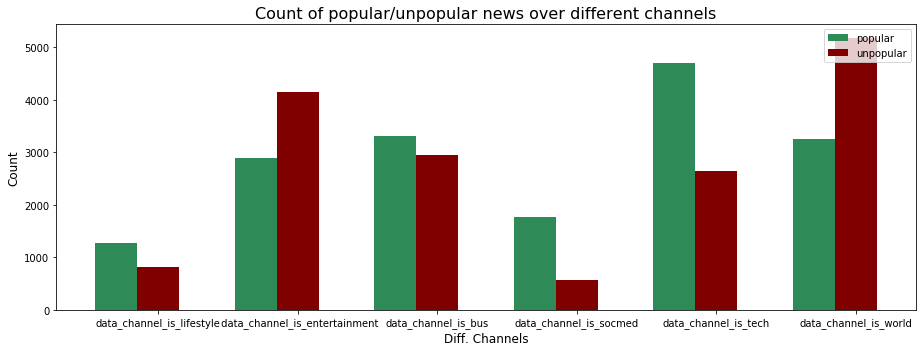

In [15]:
# Plot of Count of popular/unpopular news over different day of week

plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different channels", fontsize = 16)
plt.bar(np.arange(len(channels))-0.3, p_channel, width = 0.3, align = "center", color = 'seagreen', label = "popular")
plt.bar(np.arange(len(channels)), un_channel, width = 0.3, align="center", color = 'maroon', label = "unpopular")
plt.xticks(np.arange(len(channels)), channels)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Diff. Channels", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [16]:
# Selecting sum of 0-10 no.s of Images shared in an article  

img = []
for i in data['num_imgs'].unique():
    img.append(i)
    
img.sort()
num_img = img[0:11]

In [17]:
# Finding sum of images ranging 0-11, i.e 10
# Storing the sum in img_share

img_share = []
for j in num_img:
    total = 0
    for s in data[data['num_imgs']==j]['shares']:
        total += s
    img_share.append(total)


Text(0.5, 1.0, 'Images shared in an Article')

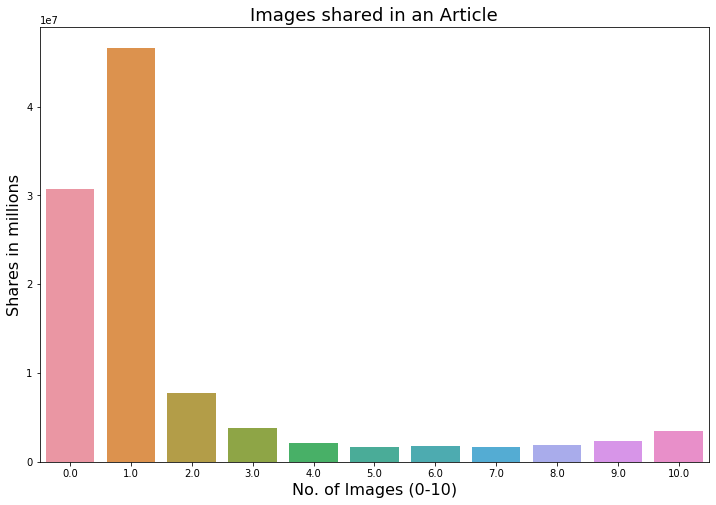

In [18]:
# Plot of Images shared in an Article 

plt.figure(figsize=(12,8))
sns.barplot(num_img, img_share)
plt.xlabel('No. of Images (0-10)', size=16)
plt.ylabel('Shares in millions', size=16)
plt.title('Images shared in an Article', size=18)

In [19]:
# Selecting sum of 0-10 no.s of Images shared in an article  

data['num_videos'].unique()

video = []
for i in data['num_videos'].unique():
    video.append(i)
    
video.sort()
num_video = video[0:11]
num_video

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [20]:
# Finding sum of images ranging 0-11, i.e 10
# Storing the sum in img_share

video_share = []
for j in num_video:
    total = 0
    for s in data[data['num_videos']==j]['shares']:
        total += s
    video_share.append(total)

Text(0.5, 1.0, 'Videos shared in an Article')

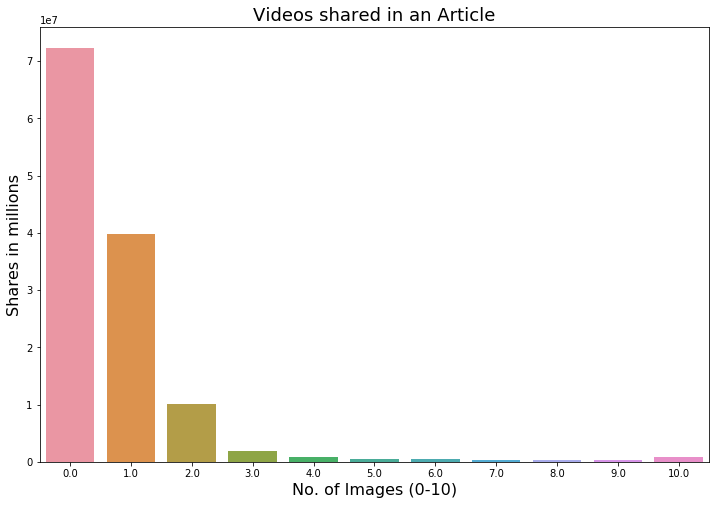

In [21]:
# Plot of Videos shared in an Article

plt.figure(figsize=(12,8))
sns.barplot(num_video, video_share)
plt.xlabel('No. of Images (0-10)', size=16)
plt.ylabel('Shares in millions', size=16)
plt.title('Videos shared in an Article', size=18)

In [33]:
popular=data.shares>=1400
unpopular=data.shares<1400
data.loc[popular,'shares']=1
data.loc[unpopular,'shares']=0

# Applying np.log() method to calculate the natural logarithmic value of the data values of array values

In [51]:
cols1=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]

In [52]:
cols2=["global_subjectivity","rate_positive_words","rate_negative_words",
     "avg_positive_polarity","min_positive_polarity","max_positive_polarity","avg_negative_polarity","min_negative_polarity",
     "max_negative_polarity","title_subjectivity","abs_title_sentiment_polarity"]

In [53]:
cols3= ["url","timedelta","shares"]

In [54]:
for i in data.columns:
    if i not in cols1 and i not in cols2 and i not in cols3:
        data[i]=np.log(1.001+data[i])

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364,505


In [38]:
# Features of the given dataset

features=list(data.columns[2:60])
X = data[features]
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,0.001000,1.737192,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500
1,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,0.001000,1.777445,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000
2,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,0.001000,1.685355,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000
3,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,0.001000,1.687490,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000
4,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,0.001000,1.737626,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,2.484990,5.849328,0.425302,0.693647,0.522230,2.302685,2.079567,0.693647,0.693647,1.709124,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.001000,0.337186,0.000000
39640,2.565026,5.796061,0.529037,0.693647,0.634489,2.302685,2.079567,1.386544,3.891841,1.687600,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,0.693647,0.183155,1.000000
39641,2.397986,6.093572,0.416969,0.693647,0.497818,3.218916,0.693647,2.565026,0.693647,1.804663,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.128713,0.045408,0.136364
39642,1.946053,6.526496,0.432103,0.693647,0.526892,2.397986,0.693647,0.693647,0.001000,1.787764,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.001000,0.406132,0.000000


In [39]:
# Target of the given dataset

target = data['shares']
Y = target

In [40]:
# Import training dependencies

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Use sklearn.model_selection to split the data into a training set and a testing 

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## Training the models 

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf_rf.fit(X_train,Y_train)
y_pred_rf = clf_rf.predict(X_test)
print("RandomForestClassifier Acuracy: ", accuracy_score(Y_test, y_pred_rf))

RandomForestClassifier Acuracy:  0.662798910301685


In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,Y_train)
y_pred_knn=clf_knn.predict(X_test)
print ("KNeighborsClassifier Accuracy: ",accuracy_score(Y_test, y_pred_knn))

KNeighborsClassifier Accuracy:  0.607002320653819


In [44]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
y_pred_dt=clf_dt.predict(X_test)
print ("DecisionTreeClassifier Accuracy: ",accuracy_score(Y_test, y_pred_dt))

DecisionTreeClassifier Accuracy:  0.579053576833821


# Accuracy of RandomForestClassifier:  0.662798910301685 is more.

# -Thank you
# Arpan Patnaik